In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms 
from torch.utils.data import DataLoader 
from matplotlib import pyplot as plt 
import numpy as np

In [2]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 
device

device(type='cuda')

In [3]:
# Transformations
transform = transforms.Compose([
    transforms. ToTensor(),
    transforms. Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform) 
test_dataset = torchvision.datasets.CIFAR10 (root='./data', train=False, download=True, transform=transform)

100%|██████████| 170M/170M [00:06<00:00, 25.2MB/s] 


In [4]:
len(train_dataset), len(test_dataset)

(50000, 10000)

In [5]:
batch_size = 100

# Data Loader

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [6]:
for i, (images, labels) in enumerate(train_loader):
    print(images.shape)
    print(labels.shape)
    break

torch.Size([100, 3, 32, 32])
torch.Size([100])


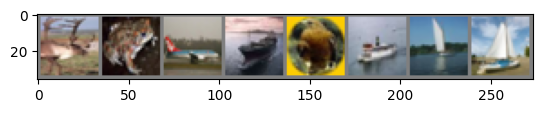

In [7]:
def imshow(img):
    img = img / 2 + 0.5     #unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# show images
imshow(torchvision.utils.make_grid(images[:8]))

In [8]:
labels[:8]

tensor([4, 6, 0, 8, 2, 8, 8, 8])

In [13]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [14]:
[classes[i] for i in labels[:8]]

['deer', 'frog', 'plane', 'ship', 'bird', 'ship', 'ship', 'ship']

In [21]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(3,3), stride=1, padding='same'), # output : (32, 32, 32)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)), # output : (32, 16, 16)
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3,3), stride=1, padding='valid'), # output : (64, 14, 14)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)) # output: (64, 7, 7)
        )
        
        self.fc_layers = nn.Sequential(
            nn.Flatten(), # output: 64*7*7
            nn.Linear(64*7*7, 600),
            nn.ReLU(),
            nn.Linear(600, 120),
            nn.ReLU(),
            nn.Linear(120, 10),
            # nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.network(x)
        x = self.fc_layers(x)
        return x

In [22]:
#Hyperparameters 
num_epochs = 10
learning_rate = 0.001
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [23]:
# Training Loop
total_step = len(train_loader)
for epoch in range (num_epochs):
    for i, (images, labels) in enumerate (train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f" Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}")


# Testing the model model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print(f"Accuracy of the model on the 10000 test images: {100 * correct / total:.2f}%")

 Epoch [1/10], Step [100/500], Loss: 1.4816
 Epoch [1/10], Step [200/500], Loss: 1.3441
 Epoch [1/10], Step [300/500], Loss: 1.3233
 Epoch [1/10], Step [400/500], Loss: 1.2415
 Epoch [1/10], Step [500/500], Loss: 1.1116
 Epoch [2/10], Step [100/500], Loss: 0.9744
 Epoch [2/10], Step [200/500], Loss: 0.9135
 Epoch [2/10], Step [300/500], Loss: 1.1238
 Epoch [2/10], Step [400/500], Loss: 0.8598
 Epoch [2/10], Step [500/500], Loss: 1.0222
 Epoch [3/10], Step [100/500], Loss: 1.1094
 Epoch [3/10], Step [200/500], Loss: 0.9139
 Epoch [3/10], Step [300/500], Loss: 0.9029
 Epoch [3/10], Step [400/500], Loss: 0.4890
 Epoch [3/10], Step [500/500], Loss: 0.9113
 Epoch [4/10], Step [100/500], Loss: 0.5949
 Epoch [4/10], Step [200/500], Loss: 0.4465
 Epoch [4/10], Step [300/500], Loss: 0.7933
 Epoch [4/10], Step [400/500], Loss: 0.5774
 Epoch [4/10], Step [500/500], Loss: 0.6576
 Epoch [5/10], Step [100/500], Loss: 0.4524
 Epoch [5/10], Step [200/500], Loss: 0.4516
 Epoch [5/10], Step [300/500], L

## With Data Augmentation

In [26]:
# Transformations
transform_with_augmentation = transforms.Compose([
    
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [27]:

# CIFAR-10 dataset
train_dataset_aug = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform) 
train_loader_aug = DataLoader(train_dataset_aug, batch_size=32, shuffle=True)

model_aug = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(params=model_aug.parameters(), lr=learning_rate)

In [28]:
# Training Loop
total_step = len(train_loader_aug)
for epoch in range (num_epochs):
    for i, (images, labels) in enumerate (train_loader_aug):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model_aug(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f" Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}")


# Testing the model model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model_aug(images)
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print(f"Accuracy of the model on the 10000 test images: {100 * correct / total:.2f}%")

 Epoch [1/10], Step [100/1563], Loss: 1.8659
 Epoch [1/10], Step [200/1563], Loss: 1.4273
 Epoch [1/10], Step [300/1563], Loss: 1.3637
 Epoch [1/10], Step [400/1563], Loss: 1.3701
 Epoch [1/10], Step [500/1563], Loss: 1.1745
 Epoch [1/10], Step [600/1563], Loss: 1.2564
 Epoch [1/10], Step [700/1563], Loss: 1.3957
 Epoch [1/10], Step [800/1563], Loss: 1.3912
 Epoch [1/10], Step [900/1563], Loss: 1.1443
 Epoch [1/10], Step [1000/1563], Loss: 1.1028
 Epoch [1/10], Step [1100/1563], Loss: 0.9479
 Epoch [1/10], Step [1200/1563], Loss: 1.4034
 Epoch [1/10], Step [1300/1563], Loss: 1.3430
 Epoch [1/10], Step [1400/1563], Loss: 1.1963
 Epoch [1/10], Step [1500/1563], Loss: 1.1566
 Epoch [2/10], Step [100/1563], Loss: 0.8721
 Epoch [2/10], Step [200/1563], Loss: 1.0358
 Epoch [2/10], Step [300/1563], Loss: 1.4088
 Epoch [2/10], Step [400/1563], Loss: 0.8645
 Epoch [2/10], Step [500/1563], Loss: 1.3106
 Epoch [2/10], Step [600/1563], Loss: 0.9467
 Epoch [2/10], Step [700/1563], Loss: 0.6995
 Epo